<a href="https://colab.research.google.com/github/sindhura-nk/Artificial-Intelligence-1446/blob/main/MultiClass_Classification_with_Keras_with_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Connect to T4 GPU before proceeding
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_train%20(1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [7]:
df.shape

(2000, 21)

In [8]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y Features

In [9]:
X = df.drop(columns='price_range')
Y = df[['price_range']]

In [10]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [11]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Data cleaning and data preprocessing

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')


X_pre = num_pipe.fit_transform(X)
X_pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


## Split the data into training and testing

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.80,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep='\t')

(1600, 20)	(400, 20)	(1600, 1)	(400, 1)


## Convert y data into categorical data- preprocess the Y daTA

In [14]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [15]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [16]:
ytrain_cat[:1]

array([[0., 1., 0., 0.]])

In [17]:
ytrain_cat.shape

(1600, 4)

## Model building

In [18]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [19]:
xtrain.shape[1]

20

In [20]:
ytrain_cat.shape

(1600, 4)

In [21]:
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer-Hidden layer1
model.add(Dense(units=32,activation='relu'))

# Add the BatchNOrmalization layer
model.add(BatchNormalization())

# Add the Dense layer-Hidden layer2
model.add(Dense(units=16,activation='relu'))

# Add the second batchnoramlization layer
model.add(BatchNormalization())

# Add the output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,460 (5.70 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 96 (384.00 B)

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [25]:
nn = model.fit(xtrain,ytrain_cat,epochs=200,validation_split=0.25,callbacks=[es])

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2917 - loss: 1.6963 - val_accuracy: 0.3400 - val_loss: 1.3667
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4182 - loss: 1.3454 - val_accuracy: 0.4200 - val_loss: 1.2420
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 1.1098 - val_accuracy: 0.5000 - val_loss: 1.1278
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5613 - loss: 1.0260 - val_accuracy: 0.5525 - val_loss: 1.0176
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6011 - loss: 0.9066 - val_accuracy: 0.5775 - val_loss: 0.9358
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 0.8470 - val_accuracy: 0.6150 - val_loss: 0.8716
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6391 - loss: 0.8056 - val_accuracy: 0.6375 - val_loss: 0.8110
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6496 - loss: 0.7331 - val_accuracy: 0.6625 - 

## Learning Curve

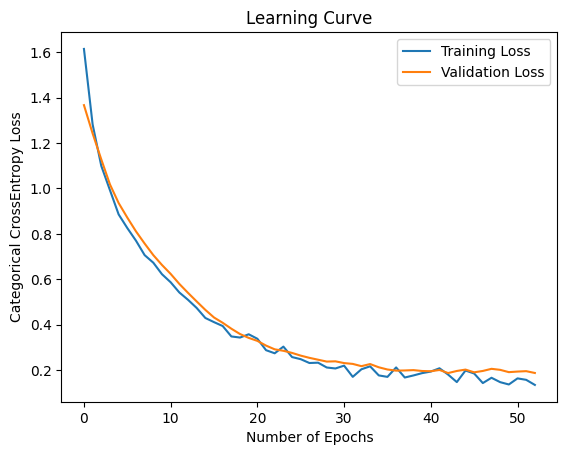

In [26]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label ='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Categorical CrossEntropy Loss')
plt.show()

## Evaluate the model

In [27]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0683


[0.0907960906624794, 0.9775000214576721]

In [28]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.2284 


[0.21825161576271057, 0.9075000286102295]

## Save the model for final out of sample predictions

In [29]:
model.save('MobilePrice.keras')

## Load the model

In [30]:
from keras.models import load_model
m1 = load_model('/content/MobilePrice.keras')
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,190 (16.37 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 2,730 (10.67 KB)

ytrain['price_range'].unique(

In [31]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [32]:
ypreds_test = m1.predict(xtest)
ypreds_test[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([9.334844e-01, 6.597469e-02, 5.328888e-04, 7.974268e-06],
      dtype=float32)

In [33]:
import numpy as np
final_ypreds_test = np.argmax(ypreds_test,axis=1)
final_ypreds_test[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [34]:
from sklearn.metrics import accuracy_score
ac_sc = accuracy_score(ytest,final_ypreds_test)
ac_sc

0.9075

## Check the confusion matrix and classification reports as well

In [35]:
ytest_cat[0]

array([1., 0., 0., 0.])

In [36]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(m1,xtest,ytest_cat)
# plt.show()

In [37]:
print(classification_report(ytest,final_ypreds_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.89      0.93      0.91        91
           2       0.83      0.87      0.85        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Out of sample predictions

In [38]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_test%20(1).csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [39]:
xnew2 = xnew.drop(columns='id')
xnew_pre = num_pipe.transform(xnew2)
final_preds = m1.predict(xnew_pre)
final_preds[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[2.34427898e-05, 2.51563592e-03, 6.39086485e-01, 3.58374417e-01],
       [2.98798523e-06, 8.03306248e-05, 7.75677264e-02, 9.22348857e-01],
       [4.13211324e-04, 1.02540910e-01, 8.32334757e-01, 6.47109896e-02],
       [6.55142784e-08, 1.06954275e-07, 6.58746212e-05, 9.99933958e-01],
       [3.44687607e-03, 9.95031595e-01, 1.51893427e-03, 2.65184849e-06]],
      dtype=float32)

In [40]:
final_preds2 = np.argmax(final_preds,axis=1)
final_preds2[:10]

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [41]:
xnew['Mobile Price Range Predictions']=final_preds2
xnew.to_csv('Predictions.csv',index=False)